Стандарден проект ВНП

Тема: **Прибирање на податоци за различни производи од повеќе е-продавници, нивно претпроцесирање и стандардизација.**

Изработен од: Андреј Трајковски 223255

# Почеток на проектот и поставувања:

Домен на производите: **Електроника** (Технологија)

Веб страници:
1. **Мобеликс**
2. **Нептун**
3. **Сетек**

In [1]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 r

In [2]:
!apt-get install -y chromium-browser chromium-chromedriver

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor libfuse3-3 libudev1 snapd squashfs-tools systemd-hwe-hwdb udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 snapd
  squashfs-tools systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 30.3 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.4 [598 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1:4.5-3build1 [159 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libudev1 amd64 249.11-0ubuntu3.16 [76.7 kB]
Get:4 http

In [3]:
import re, requests
import json, pathlib
import urllib.parse
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import display

# Влечење на производи од Мобеликс:

In [4]:
response = requests.get("https://mobelix.com.mk/")
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
product_containers = soup.select('section.deal-of-the-day div.deal-slider > div')

In [6]:
extracted_products_mobelix = []

In [7]:
for i, container in enumerate(product_containers):
    if i >= 3:
        break

    product_link_element = container.find('a', class_='d-flex')

    if product_link_element:

        name_element = product_link_element.find('h5', class_='h2')
        product_name = name_element.text.strip() if name_element else "Не е достапно име"

        price_element = product_link_element.find('p', class_='h4 price')
        price = price_element.text.strip() if price_element else "Не е достапна цена"

        extracted_products_mobelix.append({
            "name": product_name,
            "regular_price": price + "."
        })

In [8]:
for idx, product in enumerate(extracted_products_mobelix, 1):
    print(f"Производ: {idx}")
    print(f"  Име: {product['name']}")
    print(f"  Редовна цена: {product['regular_price']}")

Производ: 1
  Име: Huawei P60 Pro
  Редовна цена: 40,000.00 ден.
Производ: 2
  Име: Galaxy S24+ 5G 12/256GB
  Редовна цена: 40,600.00 ден.
Производ: 3
  Име: Xiaomi 14 Ultra 16/512GB
  Редовна цена: 55,300.00 ден.


# Влечење на производи од Нептун:

In [9]:
base_url = "https://www.neptun.mk"

In [10]:
response = requests.get(base_url)

In [11]:
soup = BeautifulSoup(response.text, "html.parser")

<!DOCTYPE html>
<!--[if lt IE 10]>
    <script type="text/javascript">
        location.assign('upgrade.html');
    </script>
<![endif]-->
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, minimum-scale=1.0, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=1459509929" name="apple-itunes-app"/>
  <meta content="app-id=mk.neptun.neptunapp" name="google-play-app"/>
  <link href="/favicon.png" rel="icon" type="image/x-icon"/>
  <title>
   Нептун - Живеј подобро секој ден
  </title>
  <meta content=" Нептун е најголемиот малопродажен ланец за бела техника и електроника во Македонија. Основан е во 1998 година и застапен со 25 продавници." name="description"/>
  <meta name="keywords"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <base href="/"/>
  <meta content="app-id=1459509929" name="apple-itunes-app"/>
  <meta content="app-i
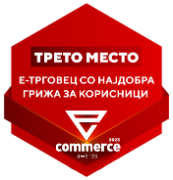
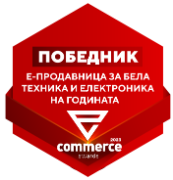
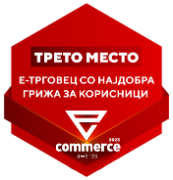
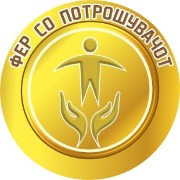

In [12]:
print(soup.prettify())

In [13]:
list_url=[1,8,18]
links = soup.select('ul.dropdown-menu > li > a[href$=".nspx"]')

In [14]:
wanted = [links[i-1] for i in list_url if i-1 < len(links)]
full_urls = [urllib.parse.urljoin(base_url, a['href']) for a in wanted]

In [15]:
for url in full_urls:
    print(url)

https://www.neptun.mk/televizori.nspx
https://www.neptun.mk/SLUSALKI_A.nspx
https://www.neptun.mk/Android_TV_boksovi.nspx


In [17]:
extracted_products_neptun = []

In [18]:
def format_price(price):
    if price is None or price == "N/A":
        return None

    if isinstance(price, float) or isinstance(price, int):
        cleaned_price = price

    elif isinstance(price, str):
        if not price.strip():
            return None
        try:
            cleaned_price = float(price)
        except ValueError:
            return price
    else:
        return None

    return f"{cleaned_price:,.2f} ден."

In [19]:
for idx, url in enumerate(full_urls, 1):

  try:
      response = requests.get(url, timeout=20)
      response.raise_for_status()
      html = response.text
  except requests.exceptions.RequestException as e:
      raise RuntimeError(f"Could not retrieve the URL: {e}")

  match = re.search(r'var\s+shopCategoryModel\s*=\s*({.*?}|"(?:\\.|[^"\\])*");', html, re.DOTALL)

  if not match:
      raise RuntimeError("The shopCategoryModel variable was not found on the page.")

  raw_json = match.group(1).strip()

  try:
      data = json.loads(raw_json)
      if isinstance(data, str):
          data = json.loads(data)
  except json.JSONDecodeError as e:
      raise RuntimeError(f"Failed to parse the extracted JSON data. Reason: {e}")

  if data and data.get("Products"):
        # Го земаме само првиот производ од листата
        first_product = data["Products"][0]

        product_name = first_product.get("Title", "N/A")
        regular_price = format_price(first_product.get("RegularPrice"))
        club_price = format_price(first_product.get("DiscountPrice"))

        product_info = {
                "name": product_name,
                "regular_price": regular_price,
                "club_price": club_price
        }
        extracted_products_neptun.append(product_info)

        # Печатиме со реден број од enumerate
        print(f"Производ: {idx}")
        print(f"  Име: {product_name}")
        print(f"  Редовна цена: {regular_price}")
        print(f"  Клуб цена: {club_price}")
  else:
      print("No products were found in the data.")

Производ: 1
  Име: HD Smart TV FUEGO 32 EL 720 GTV 32" (81cm)
  Редовна цена: 7,999.00 ден.
  Клуб цена: 6,499.00 ден.
Производ: 2
  Име: RAMPAGE RM-H19 Black
  Редовна цена: 399.00 ден.
  Клуб цена: 195.00 ден.
Производ: 3
  Име: FUEGO X98 Plus-4G64G
  Редовна цена: 2,999.00 ден.
  Клуб цена: 2,499.00 ден.


# Влечење на производи од Сетек:

In [20]:
base_url = "https://www.setec.mk/"
response = requests.get(base_url)

In [21]:
response.status_code

200

In [22]:
extracted_products_setek = []

In [23]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)

In [24]:
def format_setek_price(price_str):
    if price_str is None or price_str == "Не е достапна" or not price_str.strip():
        return None

    try:
        cleaned_price = price_str.replace(" ден.", "").strip()

        cleaned_price = cleaned_price.replace(",", "")

        num_price = float(cleaned_price)

        return f"{num_price:,.2f} ден."

    except ValueError:
        return price_str

In [25]:
try:
    driver.get(base_url)

    time.sleep(10)

    html_content = driver.page_source

    soup = BeautifulSoup(html_content, 'html.parser')

    product_containers = soup.select(".relative.bg-white.p-4.rounded-\\[20px\\]")

    if not product_containers:
        print("\nНе се пронајдени производи. Обидете се да го зголемите времето на чекање (time.sleep).")

    for idx, product in enumerate(product_containers[3:6], 1):

        name_tag = product.find('h3', class_='text-lg')
        product_name = name_tag.text.strip() if name_tag else "Не е пронајдено името"

        club_price_tag = product.select_one('p.text-orange span.text-xl')
        club_price = club_price_tag.text.strip() if club_price_tag else "Не е достапна"

        regular_price_tag = product.select_one('p.text-blackSecondary.text-xs span.text-lg')
        regular_price = regular_price_tag.text.strip() if regular_price_tag else "Не е достапна"

        regular_price = format_setek_price(regular_price)
        club_price = format_setek_price(club_price)

        product_info = {
            "name": product_name,
            "regular_price": regular_price,
            "club_price": club_price
        }
        extracted_products_setek.append(product_info)

        print(f"Производ: {idx}")
        print(f"  Име: {product_name}")
        print(f"  Редовна цена: {regular_price}")
        print(f"  Клуб цена: {club_price}")

finally:
    driver.quit()

Производ: 1
  Име: AOC FullHD LED Curved Gaming Monitor C27G4ZXE
  Редовна цена: 13,999.00 ден.
  Клуб цена: 11,799.00 ден.
Производ: 2
  Име: ASUS XA08 ROG Strix Flare II
  Редовна цена: 8,999.00 ден.
  Клуб цена: 5,799.00 ден.
Производ: 3
  Име: JBL LIVE 770NC Wireless Over-Ear Headphones Black
  Редовна цена: 9,999.00 ден.
  Клуб цена: 6,999.00 ден.


# Визуелен приказ на сите собрани производи:

In [26]:
all_products = extracted_products_mobelix + extracted_products_neptun + extracted_products_setek

In [27]:
df = pd.DataFrame(all_products)

In [28]:
display(df.style.hide(axis="index").format(na_rep="N/A"))

name,regular_price,club_price
Huawei P60 Pro,"40,000.00 ден.",N/A
Galaxy S24+ 5G 12/256GB,"40,600.00 ден.",N/A
Xiaomi 14 Ultra 16/512GB,"55,300.00 ден.",N/A
"HD Smart TV FUEGO 32 EL 720 GTV 32"" (81cm)","7,999.00 ден.","6,499.00 ден."
RAMPAGE RM-H19 Black,399.00 ден.,195.00 ден.
FUEGO X98 Plus-4G64G,"2,999.00 ден.","2,499.00 ден."
AOC FullHD LED Curved Gaming Monitor C27G4ZXE,"13,999.00 ден.","11,799.00 ден."
ASUS XA08 ROG Strix Flare II,"8,999.00 ден.","5,799.00 ден."
JBL LIVE 770NC Wireless Over-Ear Headphones Black,"9,999.00 ден.","6,999.00 ден."
